[<img src="https://user-images.githubusercontent.com/79705081/109483674-d3eea600-7a7f-11eb-9a25-58c50da4cde9.png">](http://edenlibrary.ai/)

# Weeds Identification-Object Detection-1

The following notebook is based on the ultralytivs yolov5 tutorial: 
(https://github.com/ultralytics/yolov5)

## Instructions
1. Clone the Eden repository.
2. Install notebook dependencies by running:
    <pre><code>conda create -n name_of_environment --file requirements.txt</code></pre>
3. Download the necessary dataset from Eden Repository:
   1. Broccoli-08/SEP/2019-v1
4. Unzip the dataset files and remove the zip file.
5. The resulting directory structure should be:
    * eden_library_notebooks/object_detection/
       * weeds_identification-object_detection-1.ipynb
       * Broccoli-080919-Healthy-zz-V1-XXX..
       * broc.names
       * broc.yaml
       * train.txt
       * val.txt
       * requirements.txt
6. Open the notebook: jupyter notebook
7. Run the code

**Note:** If you find any issues while executing the notebook, don't hesitate to open an issue on Github. We will reply you as soon as possible.

## Background (Go to [Biobliography](#references) for more details)

In this notebook, we are gonna cover a technique called **Object detection**, which generally refers to a process when a machine is trained to detect instances of semantic objects of a certain class (e.g. cats, dogs, flowers) in digital images and videos [1] Specifically, we are going to be using the **YOLO object detector** which was originally presented in 2016 [2] and was further developed by Ultralytics [3].

In **agriculture**, several works have arisen in the previous years ranging from crop detection such as apple detection in different growth stages [4], pest, disease detection, and weed detection in a variety of crops e.g. tomatoes [5], lettuce [6], and many more. Just type the following 3 keywords in a google scholar query YOLO, detection, agriculture results in more than 7.600 results. With most of the use cases achieving excellent F1-scores higher than 90%. The main reasons that have made YOLO so popular are the following: 1) It is really fast, 2) the model uses the entire image when training and testing so it can compute information about each class and its appearance, 3) it is capable of running object detection in real-time. Finally, and more importantly, there are available weights that were trained with millions of images and for extensive periods of time which can be downloaded and used for custom applications making the training process much faster.

Regarding the agricultural problem covered in this notebook, **weeds** compete with crops in the domain of space, light and nutrients, they are an important problem that can lead to a poorer harvest by farmers. To avoid this, weeds should be removed at every step of the growth, but especially at the initial stages. For that reason, identifying weeds accurately by deep learning has arisen as an important objective.

#### Cloning Yolo repository

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone repository
!pip install -qr yolov5/requirements.txt  # install notebook dependencies (ignore errors)

#### Library Imports

In [ ]:
import torch
from IPython.display import Image
import os
import shutil

#### Script for creating the necessary project structure
**Warning**: Take care of the **SOURCE_IMAGES_PATH** variable and change it! It should have the name of the **Broccoli dataset downloaded from the Eden platform**. Probably, the name should be something like "Broccoli-080919-Healthy-zz-V1-..."

In [8]:
# Name of the folder downloaded from Eden Platform
SOURCE_IMAGES_PATH = "./Broccoli-080919-Healthy-zz-V1-20210225102111/"

# Copying configuration files inside
shutil.copy("broc.names", "./yolov5")
shutil.copy("broc.yaml", "./yolov5")
shutil.copy("train.txt", "./yolov5")
shutil.copy("val.txt", "./yolov5")

IMAGES_PATH = "yolov5/eden_data/images/"
LABELS_PATH = "yolov5/eden_data/labels/"

os.makedirs(IMAGES_PATH + "train", exist_ok=True)
os.makedirs(IMAGES_PATH + "val", exist_ok=True)
os.makedirs(LABELS_PATH + "train", exist_ok=True)
os.makedirs(LABELS_PATH + "val", exist_ok=True)

conf_files = ["train.txt", "val.txt"]

print("Creating folder structure...")
for conf_file in conf_files:
    with open(conf_file, 'r') as reader:
        img_dst_dir = IMAGES_PATH + conf_file.split(".")[0]
        lab_dst_dir = LABELS_PATH + conf_file.split(".")[0]
        # Read and print the entire file line by line
        line = reader.readline()
        im_files = os.listdir(SOURCE_IMAGES_PATH)
        while line != '':
            aux_im = line.split("/")[-1]
            for im_file in im_files:
                if im_file.strip() == aux_im.strip():
                    shutil.copy(SOURCE_IMAGES_PATH + im_file.strip(), img_dst_dir)
                    image_annotation = im_file.strip().split(".")[0] + ".txt"
                    shutil.copy(SOURCE_IMAGES_PATH + image_annotation, lab_dst_dir)
            line = reader.readline()
print("Process finished correctly")

Creating folder structure...
Process finished correctly


#### Changing the directory for easing execution

In [9]:
%cd yolov5

/home/workstation-pa/Documents/developer/future_eden_notebooks/object_detection/yolov5


#### Checking PyTorch is working right

In [10]:
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 1.7.1 _CudaDeviceProperties(name='GeForce RTX 2080 Ti', major=7, minor=5, total_memory=11016MB, multi_processor_count=68)


#### Fine-Tuning the Yolo Network

In [ ]:
# The parameteres were selected for this specific dataset
# Experimental constants
# IMAGE_SIZE = 512
# BATCH_SIZE = 6
# EPOCHS = 80
# METADATA_FILE = broc.yaml
# WEIGHTS_FILE = yolov5m.pt

# Cleaning previous execution data
RUNS_EXP_PATH = "./runs/train/exp"
if os.path.exists(RUNS_EXP_PATH):
    shutil.rmtree(RUNS_EXP_PATH)

# Fine-tune
!python train.py --img 512 --multi-scale --batch 6 --epochs 80 --data broc.yaml --cfg yolov5m.yaml --weights yolov5m.pt --cache

#### Displaying Early Predictions

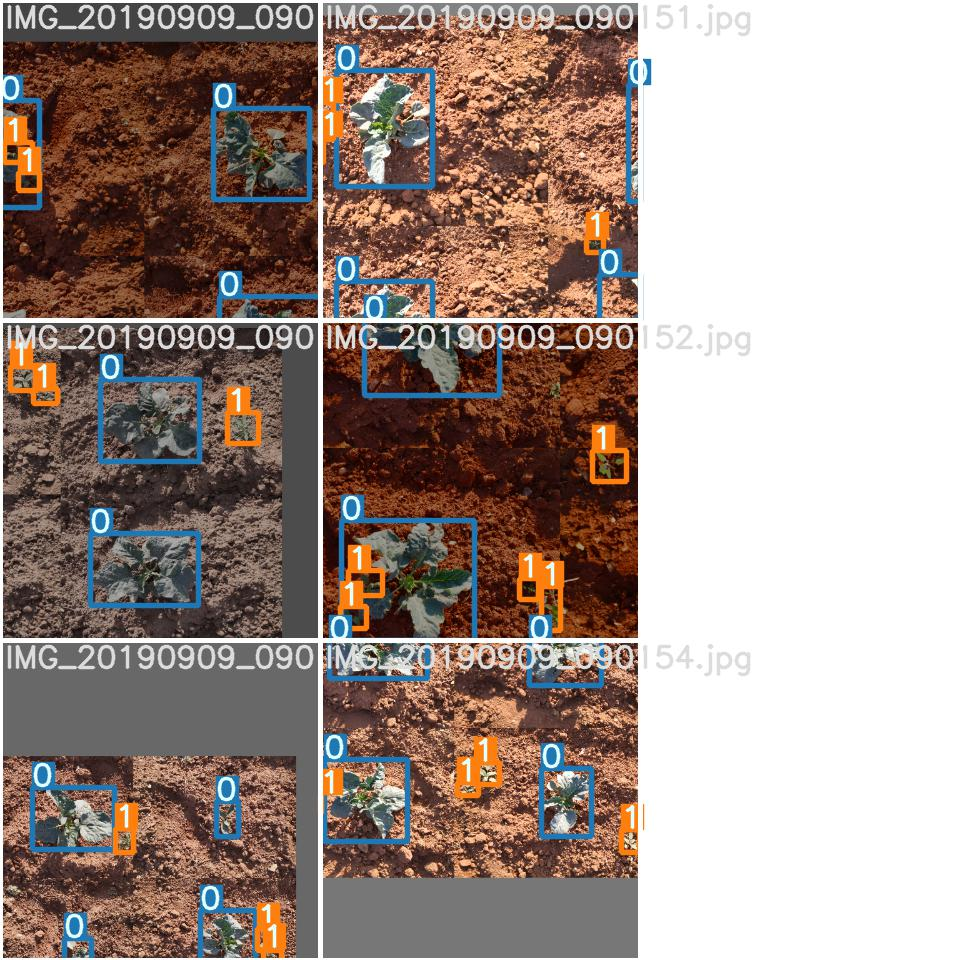

In [28]:
# If the notebook is not executed sequentially, maybe the path could change.
Image(filename='runs/train/exp/train_batch1.jpg', width=900)  # view augmented training mosaics

#### Displaying Training Data

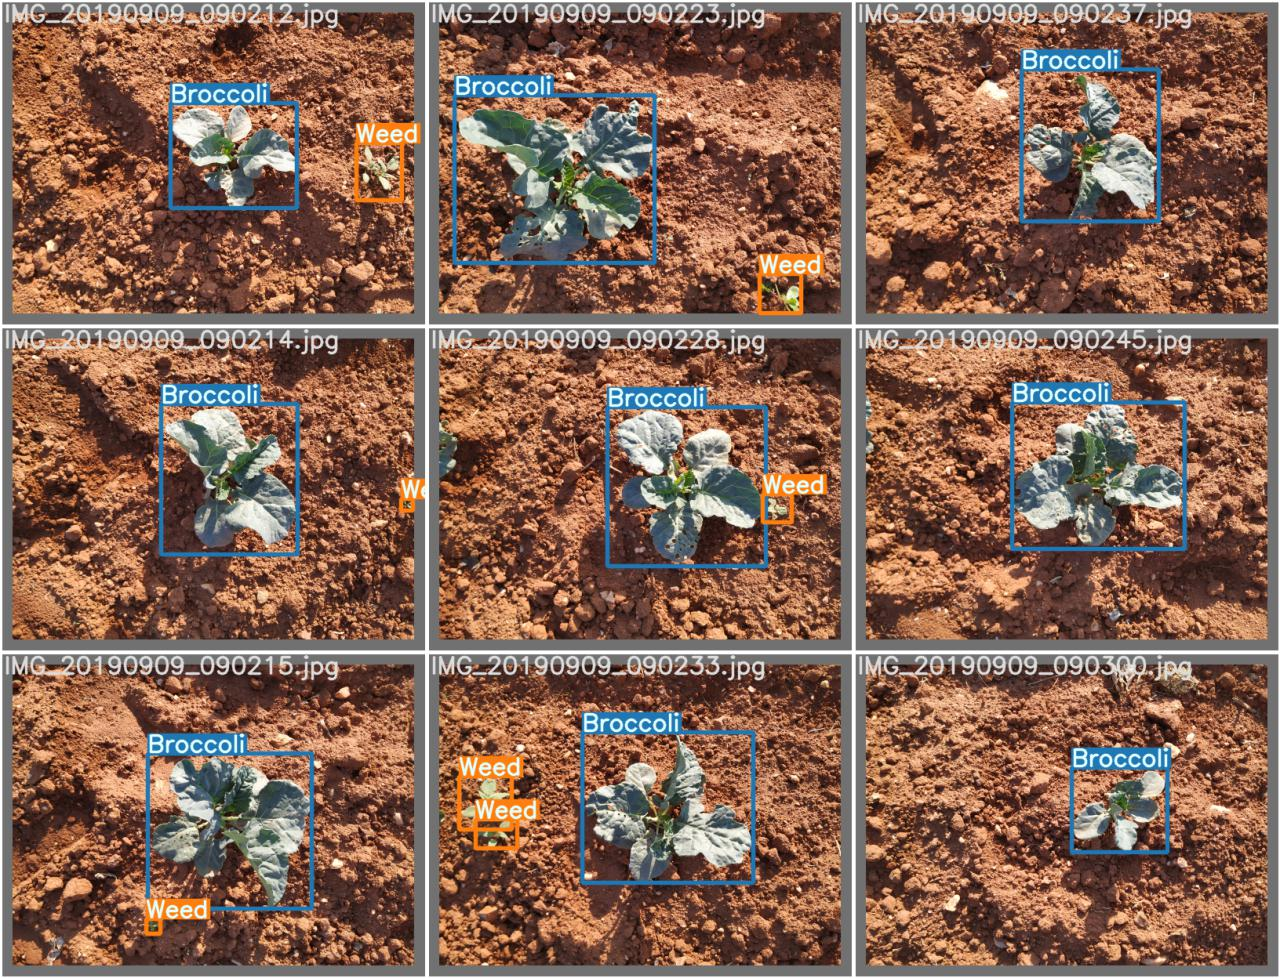

In [29]:
# If the notebook is not executed sequentially, maybe the path could change.
Image(filename='runs/train/exp/test_batch0_labels.jpg', width=900)  # view test image labels

#### Checking the fine-tuned Yolo is correctly working
Here below, we are running the object detection using the weights that provided the best results during training with  the images placed in the validation folder. 

In [ ]:
# If the notebook is not executed sequentially, maybe the path could change.
# Cleaning previous execution data
RUNS_DET_PATH = "./runs/detect/exp"
if os.path.exists(RUNS_DET_PATH):
    shutil.rmtree(RUNS_DET_PATH)

# Predict
!python detect.py --weights runs/train/exp/weights/best.pt --img 512 --conf 0.49 --source eden_data/images/val/

#### Displaying Yolo's predictions

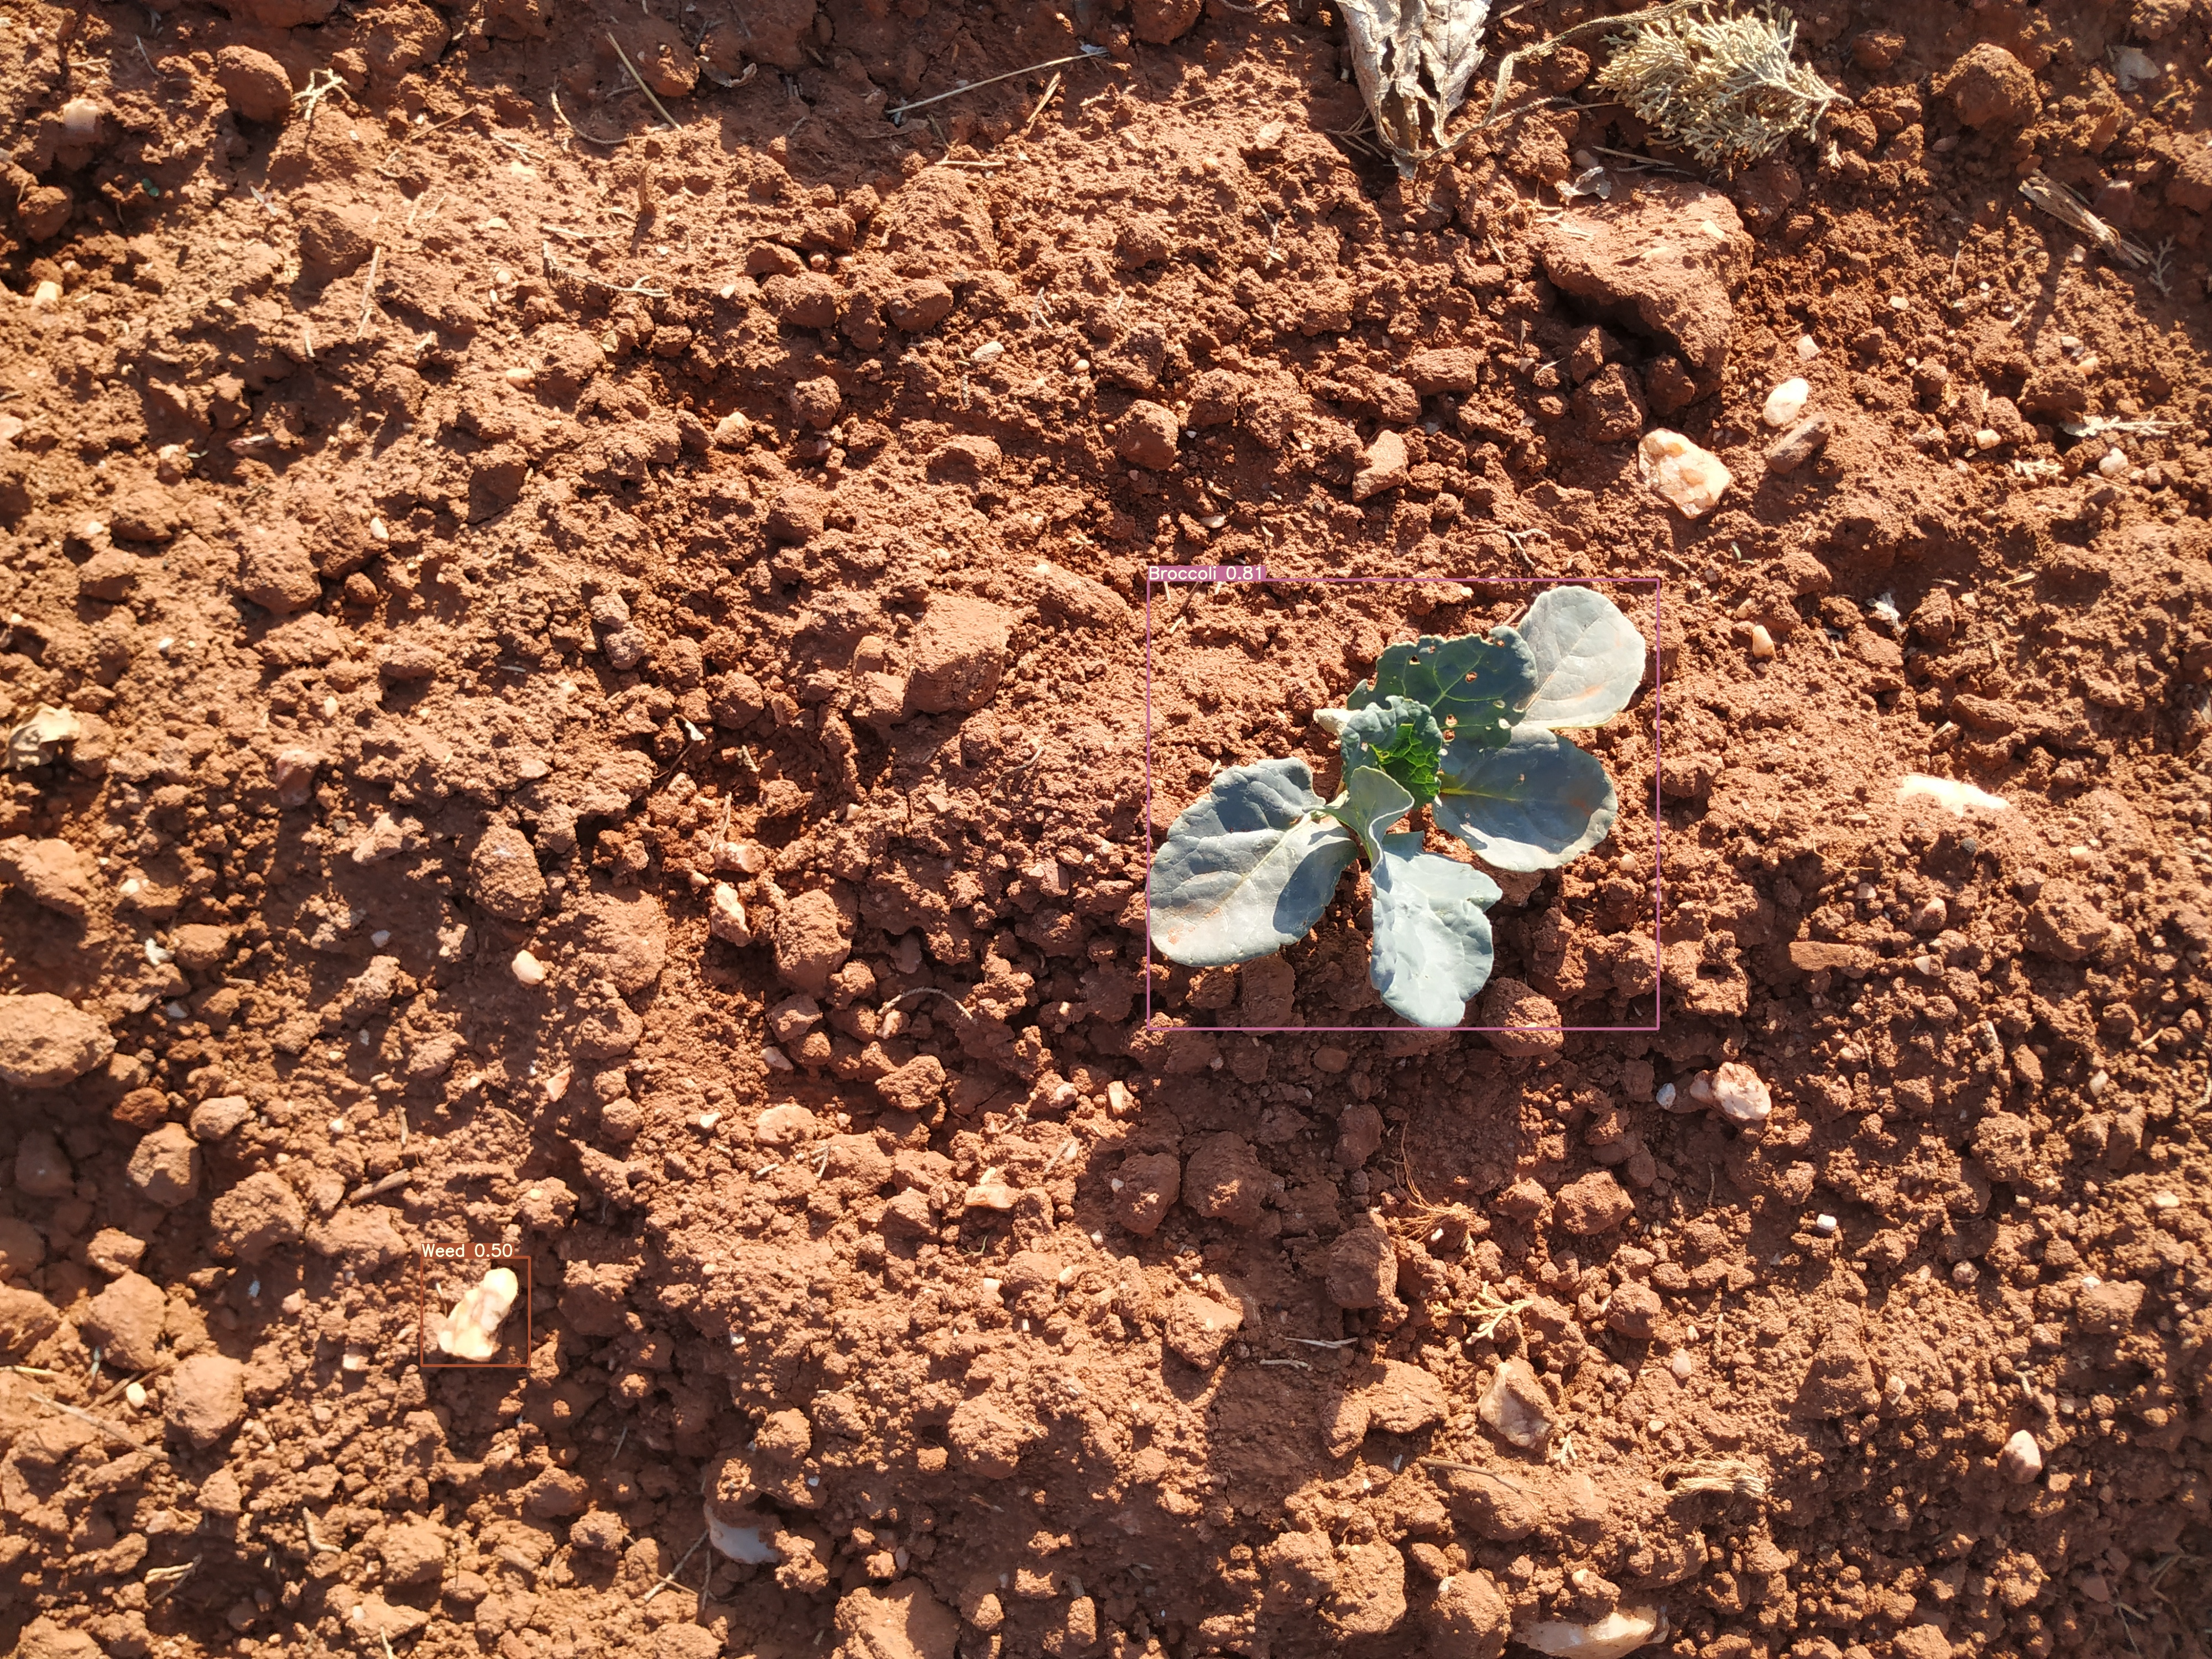

In [31]:
Image(filename='runs/detect/exp/IMG_20190909_090300.jpg', width=600)

## Possible Extensions
1. Change the image size (in this notebook 512X512 is used)
2. Try different epochs and batch sizes (in this notebook 80 and 6 are used respectively)
3. Try different models (we are using yolov5m.pt, but try yolov5s.pt, yolov5l.pt and yolov5x.pt)

## Bibliography
<a id='references'></a>

[1] Dasiopoulou, Stamatia, et al. "Knowledge-assisted semantic video object detection." IEEE Transactions on Circuits and Systems for Video Technology 15.10 (2005): 1210-1224.

[2] Redmon, Joseph, et al. "You only look once: Unified, real-time object detection." Proceedings of the IEEE conference on computer vision and pattern recognition. 2016.

[3] Glenn Jocher, Alex Stoken, Jirka Borovec, NanoCode012, ChristopherSTAN, Liu Changyu, … Lijun Yu 于力军. (2021, January 5). ultralytics/yolov5: v4.0 - nn.SiLU activations, Weights & Biases logging, PyTorch Hub integration (Version v4.0). Zenodo. http://doi.org/10.5281/zenodo.4418161

[4] Tian, Yunong, et al. "Apple detection during different growth stages in orchards using the improved YOLO-V3 model." Computers and electronics in agriculture 157 (2019): 417-426.

[5] Liu, Jun, and Xuewei Wang. "Tomato diseases and pests detection based on improved Yolo V3 convolutional neural network." Frontiers in plant science 11 (2020): 898.

[6] Osorio, Kavir, et al. "A Deep Learning Approach for Weed Detection in Lettuce Crops Using Multispectral Images." AgriEngineering 2.3 (2020): 471-488.